## Word Cloud based on news scrapped on elderly well being

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
from wordcloud import WordCloud, ImageColorGenerator 
from PIL import Image

In [2]:
df = pd.read_csv("sentimentanalysis_final.csv")

### Common data preprocessing steps on all text:

* Make text all lower case
* Remove punctuation
* Remove numerical values
* Remove common non-sensical text (/n)
* Tokenize text
* Remove stop words

In [3]:
# Apply a first round of text cleaning techniques

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [4]:
df['clean'] = df.clean.apply(round1)

In [5]:
df

Unnamed: 0                                              links  \
0              0  https://seniorsfirstbc.ca/news/seniors-first-b...   
1              1  https://seniorsfirstbc.ca/news/seniors-first-b...   
2              2  https://seniorsfirstbc.ca/news/vaccine-appoint...   
3              3              https://seniorsfirstbc.ca/news/11839/   
4              4  https://seniorsfirstbc.ca/news/what-to-do-if-y...   
...          ...                                                ...   
1088        1310  https://helpagecanada.ca/2015/09/helpage-inter...   
1089        1311  https://helpagecanada.ca/2015/07/join-us-on-oc...   
1090        1312  https://helpagecanada.ca/2015/06/minister-alic...   
1091        1313  https://helpagecanada.ca/2015/02/february-2-20...   
1092        1314  https://helpagecanada.ca/2014/09/june-15-2014-...   

           dates                                             header  \
0     2021-10-01   Seniors First BC 2020-2021 Annual Report Release   
1     2021-07-26  Seniors First BC Hiring Part-Time Seniors Abus...   
2     2021-03-01                   Vaccine Appointments for Seniors   
3     2020-08-06                               ABUSE VERSUS NEGLECT   
4     2020-08-05       What To Do if You’ve Fallen Victim to a Scam   
...          ...                                                ...   
1088  2015-09-28  HelpAge International Releases Third Global Ag...   
1089  2015-07-28  Join us on October 1, 2015 for Seen Your Citiz...   
1090  2015-06-15  Minister Alice Wong marks Elder Abuse Day at H...   
1091  2015-02-02  HelpAge International Releases Report on Impac...   
1092  2014-09-28  Violence against older people: a global phenom...   

                                                   body  \
0     Seniors First BC recently released its Annual ...   
1     We are hiring a part-time Intake Worker to ans...   
2     Vaccine call centres for seniors open March 8,...   
3     ABUSE VERSUS NEGLECT Abuse is an action that c...   
4      What To Do if You’ve Fallen Victim to a Scam ...   
...                                                 ...   
1088  HelpAge International has released the third G...   
1089  About a million Canadian seniors describe them...   
1090  Alice Wong, Minister of State (Seniors), visit...   
1091  In 2050, for the first time in history there w...   
1092  June 15, 2014 – Violence against older people:...   

                                               b_points  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3     Usecoping techniquesto manage “caregiver stres...   
4     If it will help you feel better, reach out to ...   
...                                                 ...   
1088                                                NaN   
1089                                                NaN   
1090                                                NaN   
1091                                                NaN   
1092                                                NaN   

                                                  clean  \
0     seniors first bc recently released its annual ...   
1     we are hiring a parttime intake worker to answ...   
2     vaccine call centres for seniors open march   ...   
3     abuse versus neglect abuse is an action that c...   
4     what to do if you’ve fallen victim to a scam s...   
...                                                 ...   
1088  international has released the third global ag...   
1089  about a million canadian seniors describe them...   
1090  alice wong minister of state seniors visited t...   
1091  in  for the first time in history there will b...   
1092   – violence against older people a global phen...   

                    website  polarity  
0     seniors_first_bc_news  0.125000  
1     seniors_first_bc_news  0.300000  
2     seniors_first_bc_news  0.366667  
3     seniors

In [6]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [7]:
df['clean'] = df.clean.apply(round2)
df

Unnamed: 0                                              links  \
0              0  https://seniorsfirstbc.ca/news/seniors-first-b...   
1              1  https://seniorsfirstbc.ca/news/seniors-first-b...   
2              2  https://seniorsfirstbc.ca/news/vaccine-appoint...   
3              3              https://seniorsfirstbc.ca/news/11839/   
4              4  https://seniorsfirstbc.ca/news/what-to-do-if-y...   
...          ...                                                ...   
1088        1310  https://helpagecanada.ca/2015/09/helpage-inter...   
1089        1311  https://helpagecanada.ca/2015/07/join-us-on-oc...   
1090        1312  https://helpagecanada.ca/2015/06/minister-alic...   
1091        1313  https://helpagecanada.ca/2015/02/february-2-20...   
1092        1314  https://helpagecanada.ca/2014/09/june-15-2014-...   

           dates                                             header  \
0     2021-10-01   Seniors First BC 2020-2021 Annual Report Release   
1     2021-07-26  Seniors First BC Hiring Part-Time Seniors Abus...   
2     2021-03-01                   Vaccine Appointments for Seniors   
3     2020-08-06                               ABUSE VERSUS NEGLECT   
4     2020-08-05       What To Do if You’ve Fallen Victim to a Scam   
...          ...                                                ...   
1088  2015-09-28  HelpAge International Releases Third Global Ag...   
1089  2015-07-28  Join us on October 1, 2015 for Seen Your Citiz...   
1090  2015-06-15  Minister Alice Wong marks Elder Abuse Day at H...   
1091  2015-02-02  HelpAge International Releases Report on Impac...   
1092  2014-09-28  Violence against older people: a global phenom...   

                                                   body  \
0     Seniors First BC recently released its Annual ...   
1     We are hiring a part-time Intake Worker to ans...   
2     Vaccine call centres for seniors open March 8,...   
3     ABUSE VERSUS NEGLECT Abuse is an action that c...   
4      What To Do if You’ve Fallen Victim to a Scam ...   
...                                                 ...   
1088  HelpAge International has released the third G...   
1089  About a million Canadian seniors describe them...   
1090  Alice Wong, Minister of State (Seniors), visit...   
1091  In 2050, for the first time in history there w...   
1092  June 15, 2014 – Violence against older people:...   

                                               b_points  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3     Usecoping techniquesto manage “caregiver stres...   
4     If it will help you feel better, reach out to ...   
...                                                 ...   
1088                                                NaN   
1089                                                NaN   
1090                                                NaN   
1091                                                NaN   
1092                                                NaN   

                                                  clean  \
0     seniors first bc recently released its annual ...   
1     we are hiring a parttime intake worker to answ...   
2     vaccine call centres for seniors open march   ...   
3     abuse versus neglect abuse is an action that c...   
4     what to do if youve fallen victim to a scam sc...   
...                                                 ...   
1088  international has released the third global ag...   
1089  about a million canadian seniors describe them...   
1090  alice wong minister of state seniors visited t...   
1091  in  for the first time in history there will b...   
1092   – violence against older people a global phen...   

                    website  polarity  
0     seniors_first_bc_news  0.125000  
1     seniors_first_bc_news  0.300000  
2     seniors_first_bc_news  0.366667  
3     seniors

In [8]:
# Rechecking for stopwords
#frequency of words in the entire df['clean']
corpus = " ".join(df['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

In [9]:
ngramFreq.most_common(200)

[(('the',), 27048),
 (('and',), 22146),
 (('to',), 20654),
 (('of',), 17520),
 (('a',), 12696),
 (('in',), 11532),
 (('for',), 9104),
 (('is',), 6752),
 (('with',), 6465),
 (('that',), 6128),
 (('are',), 5287),
 (('housing',), 5231),
 (('as',), 4097),
 (('on',), 4091),
 (('or',), 4073),
 (('people',), 3937),
 (('i',), 3655),
 (('be',), 3507),
 (('this',), 3188),
 (('have',), 3176),
 (('it',), 2874),
 (('at',), 2849),
 (('their',), 2832),
 (('will',), 2781),
 (('homes',), 2765),
 (('we',), 2710),
 (('you',), 2616),
 (('can',), 2597),
 (('more',), 2593),
 (('seniors',), 2172),
 (('by',), 2153),
 (('our',), 2148),
 (('my',), 2133),
 (('who',), 2090),
 (('new',), 2074),
 (('your',), 2028),
 (('they',), 2023),
 (('from',), 2008),
 (('was',), 1968),
 (('not',), 1937),
 (('health',), 1934),
 (('an',), 1886),
 (('care',), 1846),
 (('bc',), 1820),
 (('older',), 1736),
 (('about',), 1716),
 (('affordable',), 1666),
 (('community',), 1647),
 (('but',), 1628),
 (('these',), 1515),
 (('all',), 1493

In [10]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#Adding the unwanted words into the stopwords list.
stop_words = stopwords.words('english')
stop_words.extend(['the',
'and',
'to', 
'of', 
'a', 
'in',
'for', 
'is', 
'with',
'that', 
'are', 
'as', 
'on', 
'or', 
'i', 
'be', 
'have', 
'this', 
'at', 
'it', 
'their', 
'will', 
'we', 
'more', 
'you', 
'can', 
'by', 
'who', 
'they', 
'our', 
'was', 
'from', 
'my', 
'new', 
'not', 
'your',
'an', 
'about', 
'but', 
'said', 
'all', 
'these', 
'has', 
'when', 
'also', 
'were', 
'one', 
'than', 
'–',
'may', 
'need',
'if', 
'her',
'there', 
'some', 
'she', 
'been', 
'other', 
'which', 
'its', 
'those', 
'many', 
'what', 
'so', 
'up', 
'do', 
'them', 
'how', 
'years', 
'us', 
'over', 
'had', 
'most', 
'no', 
'he', 
'between', 
'me', 
'such', 
'through', 
'—', 
'into', 
'including', 
'get', 
'would', 
'two', 
'while', 
'very', 
'where', 
'his', 
'only', 
'because', 
'often', 
'units', 
'could', 
'dont', 
'year', 
'during', 
'way', 
'want', 
'any', 
'says', 
'per', 
'example', 
'still', 
'see', 
'should', 
'number', 
'own'])

In [12]:
clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)

In [13]:
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

In [14]:
BigramnonstopFreq.most_common(200)

[(('housing',), 5231),
 (('people',), 3937),
 (('homes',), 2765),
 (('seniors',), 2172),
 (('health',), 1934),
 (('care',), 1846),
 (('bc',), 1820),
 (('older',), 1736),
 (('affordable',), 1666),
 (('community',), 1647),
 (('help',), 1399),
 (('support',), 1194),
 (('province',), 1107),
 (('adults',), 1043),
 (('services',), 1038),
 (('home',), 1031),
 (('building',), 921),
 (('like',), 911),
 (('social',), 899),
 (('project',), 881),
 (('needs',), 839),
 (('time',), 820),
 (('provide',), 801),
 (('residents',), 801),
 (('age',), 776),
 (('life',), 770),
 (('risk',), 767),
 (('women',), 751),
 (('well',), 733),
 (('living',), 729),
 (('make',), 726),
 (('society',), 726),
 (('government',), 691),
 (('incomes',), 687),
 (('place',), 683),
 (('homelessness',), 681),
 (('work',), 674),
 (('families',), 662),
 (('first',), 651),
 (('city',), 648),
 (('studies',), 602),
 (('find',), 596),
 (('part',), 591),
 (('learn',), 583),
 (('family',), 572),
 (('experiencing',), 567),
 (('review',), 5

Source: word cloud
https://towardsdatascience.com/how-to-easily-make-beautiful-wordclouds-in-python-55789102f6f5  
https://towardsdatascience.com/creating-word-clouds-with-python-f2077c8de5cc

In [16]:
import datetime
df['year'] = pd.DatetimeIndex(df['dates']).year

In [19]:
df.groupby(['year']).count()['clean']

year
2012      2
2013      5
2014     48
2015     52
2016     70
2017     48
2018    124
2019    150
2020    253
2021    288
2022     53
Name: clean, dtype: int64

In [21]:
#making seperate df for separate years
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
df_2018 = df[df['year']==2018]
df_2019 = df[df['year']==2019]
df_2020 = df[df['year']==2020]
df_2021 = df[df['year']==2021]
df_2022 = df[df['year']==2022]

In [ ]:
# image mask for wordcloud
#char_mask = np.array(Image.open("image.jpg"))  
#image_colors = ImageColorGenerator(char_mask)
text_l = BigramnonstopFreq.most_common(100) #list full of tuples (word, freq)

In [ ]:
#lets unpack tuple to extract words
list1, list2 = zip(*text_l)
list1

(('housing',),
 ('people',),
 ('homes',),
 ('seniors',),
 ('care',),
 ('health',),
 ('bc',),
 ('older',),
 ('community',),
 ('affordable',),
 ('help',),
 ('support',),
 ('home',),
 ('province',),
 ('services',),
 ('adults',),
 ('residents',),
 ('like',),
 ('social',),
 ('building',),
 ('time',),
 ('project',),
 ('needs',),
 ('age',),
 ('provide',),
 ('life',),
 ('risk',),
 ('living',),
 ('make',),
 ('well',),
 ('women',),
 ('government',),
 ('first',),
 ('society',),
 ('work',),
 ('place',),
 ('families',),
 ('incomes',),
 ('homelessness',),
 ('city',),
 ('family',),
 ('part',),
 ('find',),
 ('studies',),
 ('even',),
 ('use',),
 ('working',),
 ('day',),
 ('safe',),
 ('learn',),
 ('live',),
 ('longterm',),
 ('review',),
 ('experiencing',),
 ('british',),
 ('research',),
 ('good',),
 ('municipal',),
 ('information',),
 ('supportive',),
 ('take',),
 ('staff',),
 ('rental',),
 ('low',),
 ('abuse',),
 ('available',),
 ('know',),
 ('programs',),
 ('important',),
 ('affairs',),
 ('exercise',)

In [ ]:
#list1 - list of words we want but has characters like \( \) \,
#clean the list
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w

In [ ]:
text

' housing people homes seniors care health bc older community affordable help support home province services adults residents like social building time project needs age provide life risk living make well women government first society work place families incomes homelessness city family part find studies even use working day safe learn live longterm review experiencing british research good municipal information supportive take staff rental low abuse available know programs important affairs exercise canada physical build access approximately projects others around supports better vancouver hearing increase construction development found include media taking minister improve less report long three children benefits includes communities'

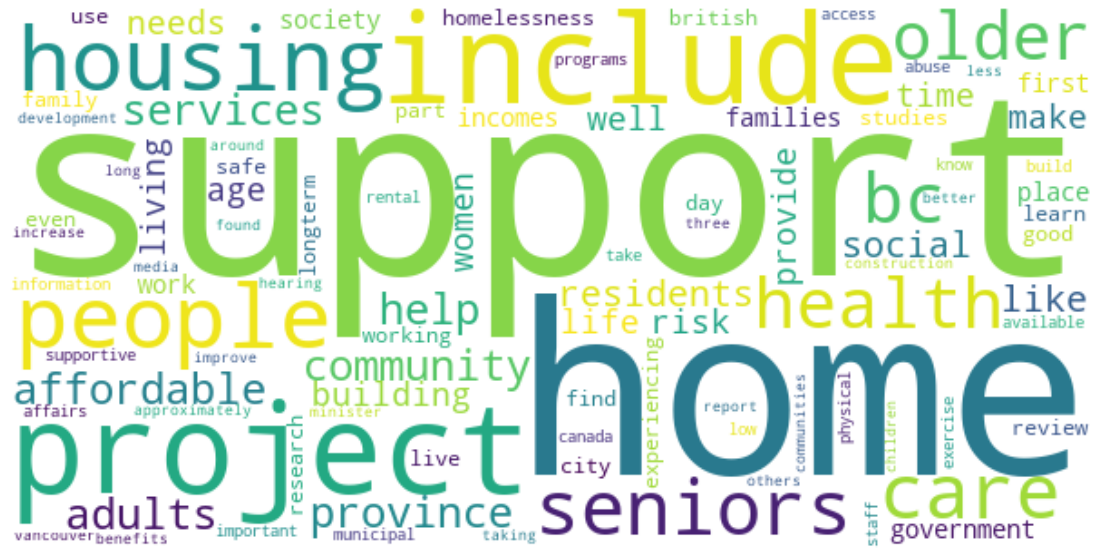

In [ ]:
# create a wordcloud

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)


# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()


In [ ]:
wc.to_file("worclcloud_news.png")

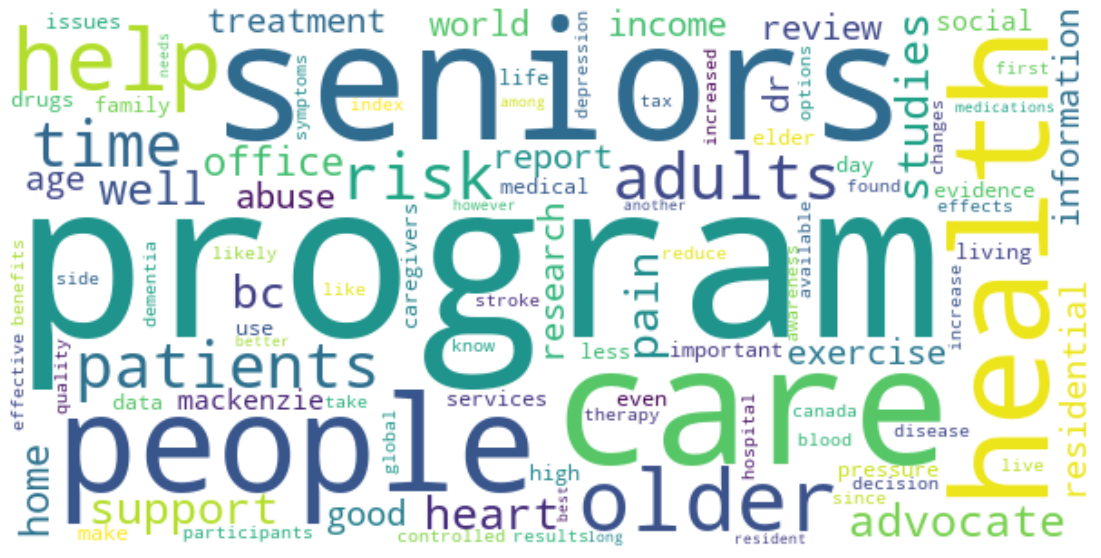

In [22]:
#df2016

corpus = " ".join(df_2016['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [23]:
wc.to_file("worclcloud_news_2016.png")

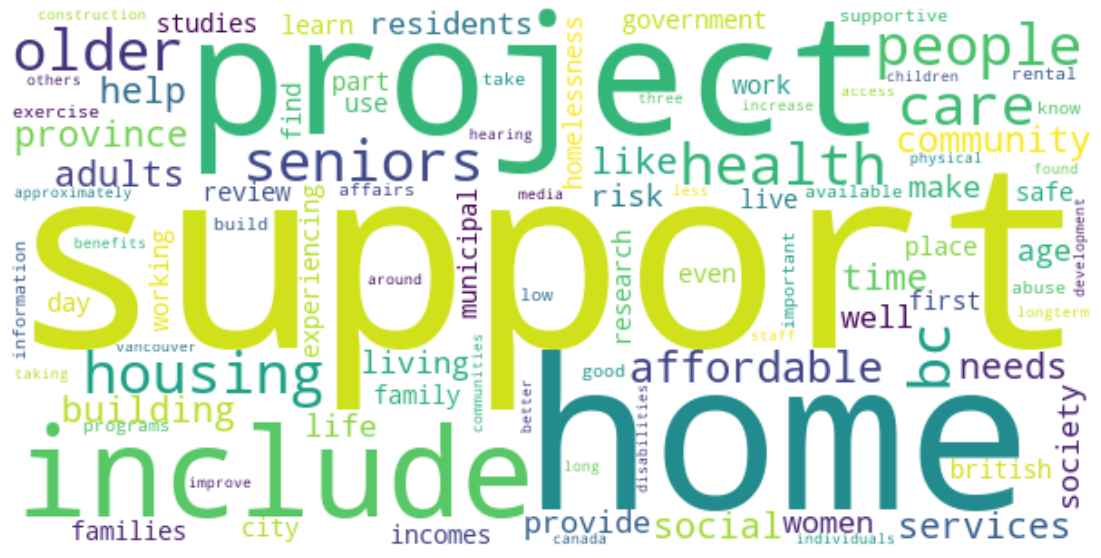

In [24]:
# df2017
corpus = " ".join(df['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [25]:
wc.to_file("worclcloud_news_2017.png")

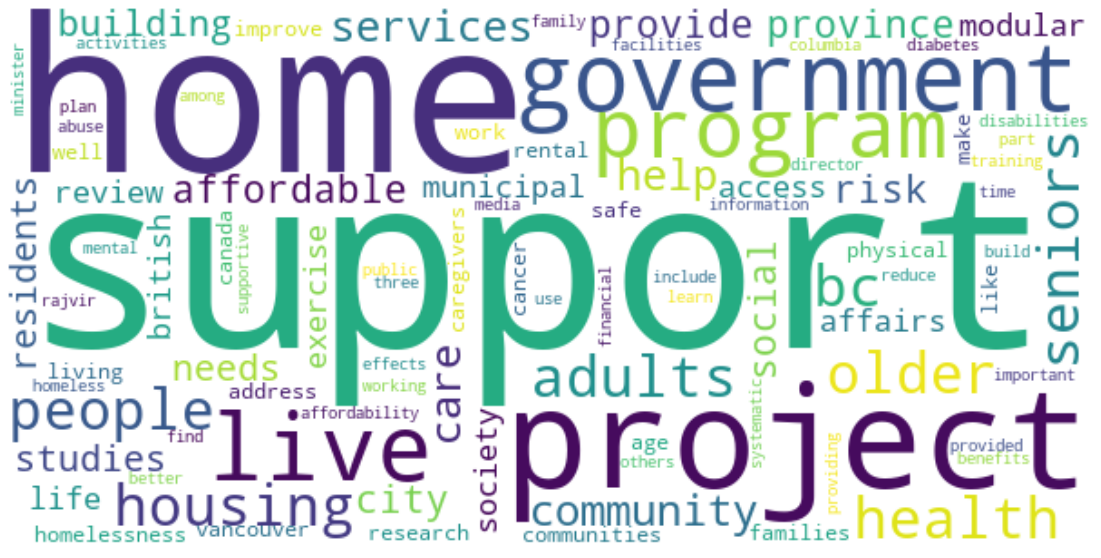

In [26]:
# df2018
corpus = " ".join(df_2018['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [27]:
wc.to_file("worclcloud_news_2018.png")

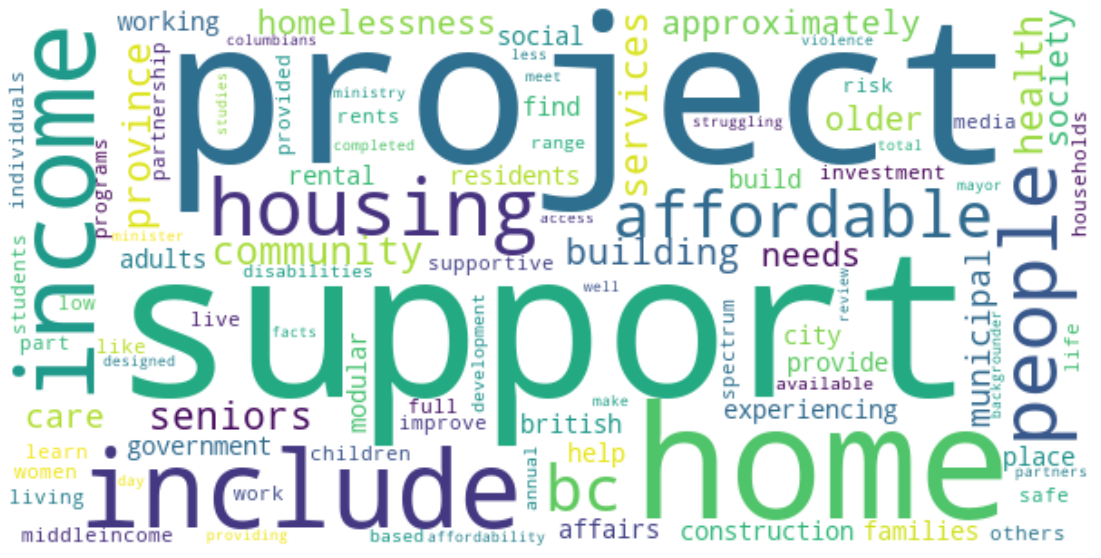

In [28]:
# df2019
corpus = " ".join(df_2019['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [29]:
wc.to_file("worclcloud_news_2019.png")

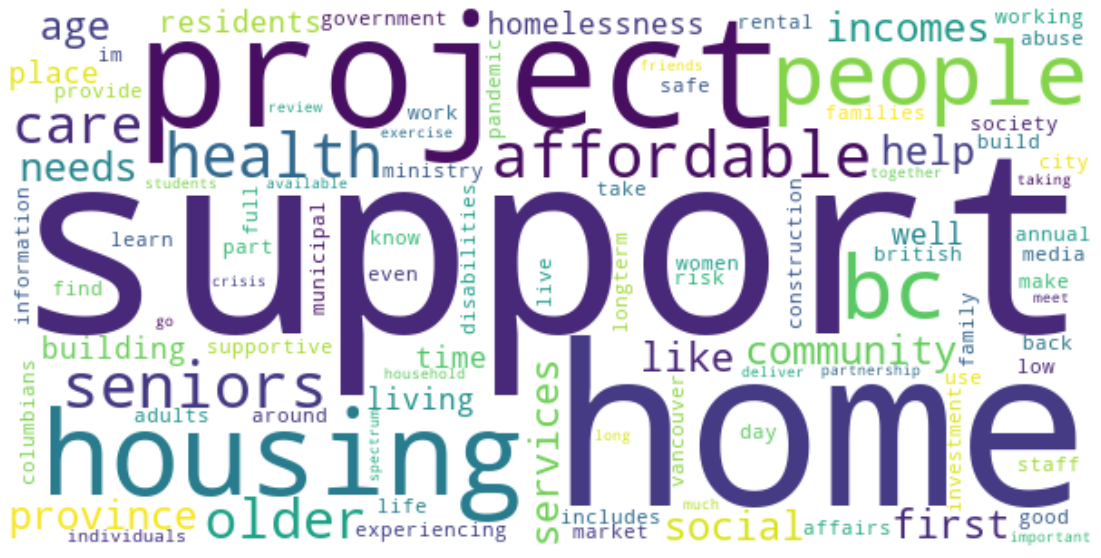

In [34]:
# df2020
corpus = " ".join(df_2020['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [35]:
wc.to_file("worclcloud_news_2020.png")

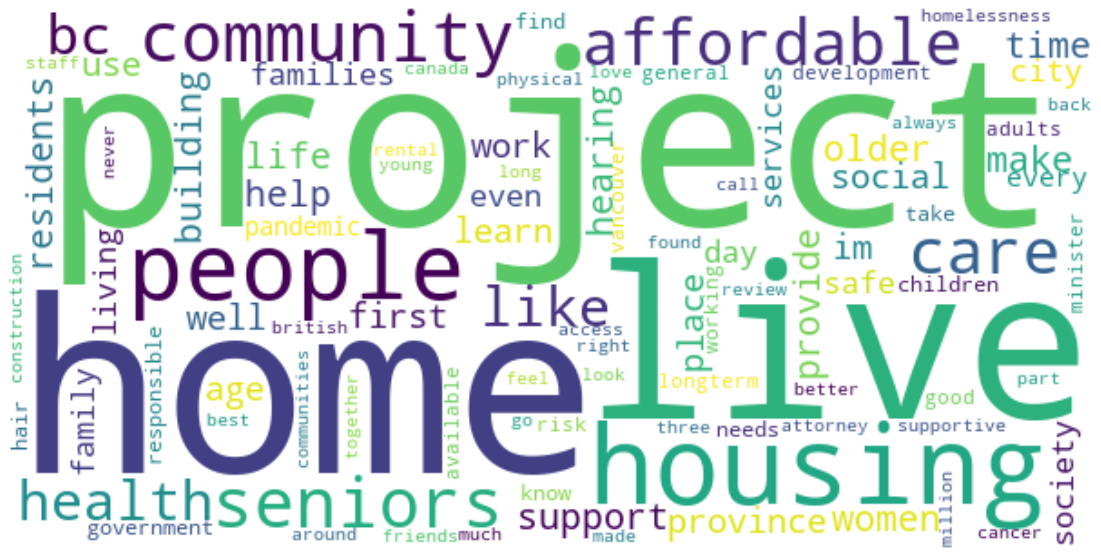

In [32]:
# df2021
corpus = " ".join(df_2021['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [33]:
wc.to_file("worclcloud_news_2021.png")

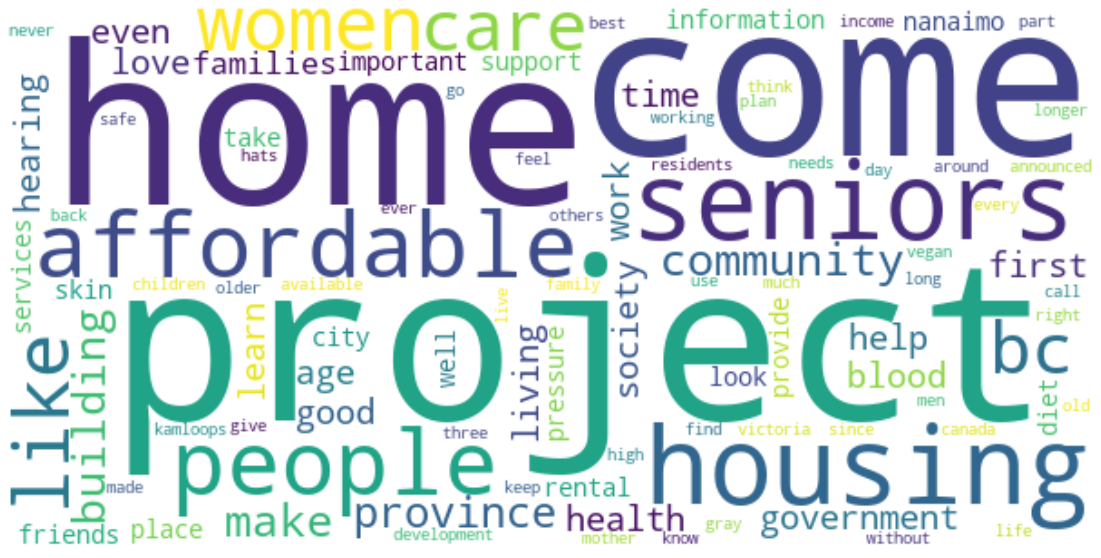

In [30]:
# df2022
corpus = " ".join(df_2022['clean'])
tokenizedcorpus = corpus.split()

ngramcorpus = ngrams(tokenizedcorpus,1)
ngramFreq = collections.Counter(ngramcorpus)

clean_text = []
for word in tokenizedcorpus:
    if word not in stop_words:
      clean_text.append(word)
	  
bigramcorpusnonstop = ngrams(clean_text,1)
BigramnonstopFreq = collections.Counter(bigramcorpusnonstop)

text_l = BigramnonstopFreq.most_common(100)

list1, list2 = zip(*text_l)
list1
text = ''
for word in list1:
  w =  ''.join(word)
  text = text + ' ' + w
  

wc = WordCloud(background_color='white',
               #mask=char_mask,
               collocations=False,
               width=600,
               height=300,
               contour_width=3,
               contour_color='black',
               stopwords=stop_words).generate(text)
			   
# plot image
plt.figure(figsize=(20, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
wc.to_file('wordcloud.png')
plt.show()

In [31]:
wc.to_file("worclcloud_news_2022.png")

All word clouds looks preety much the same despite dividing it year wise.
lets check the len of df to verify if the df were created correctly.

In [36]:
print(len(df_2016))
print(len(df_2017))
print(len(df_2018))
print(len(df_2019))
print(len(df_2020))
print(len(df_2021))
print(len(df_2022))

70
48
124
150
253
288
53
